In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
if (os.getcwd().endswith("dataset_analysis")):
    os.chdir("./../../")
os.getcwd()

'd:\\_MyDoc\\UNI\\MA-INF\\B_Data_Science\\2.Sem\\KDDM1-Know. Disc. & Data Mining 1\\2023_SS\\UE\\Ass\\_repo_kdd1_proj_2023'

In [17]:
os.makedirs("plots/knowledge_gained", exist_ok=True)
df = pd.read_csv("./data/Universities_cleaned_deduplicated.csv")

In [18]:
# Plots are generated with intel form:
# https://www.kaggle.com/code/ritish1082/eda-best-university-in-uk
# https://www.kaggle.com/code/sasakitetsuya/why-are-students-in-london-not-so-satisfied

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Id                                             131 non-null    int64  
 1   University_name                                118 non-null    object 
 2   Region                                         131 non-null    object 
 3   Founded_year                                   103 non-null    float64
 4   Motto                                          114 non-null    object 
 5   UK_rank                                        131 non-null    int64  
 6   World_rank                                     131 non-null    int64  
 7   CWUR_score                                     84 non-null     float64
 8   Minimum_IELTS_score                            131 non-null    float64
 9   UG_average_fees_(in_pounds)                    131 non

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,131.0,65.000000,37.960506,0.0000,32.5000,65.0000,97.50000,130.0000
Founded_year,103.0,1930.262136,119.861027,1209.0000,1893.5000,1967.0000,1992.00000,2013.0000
UK_rank,131.0,65.900763,37.922158,1.0000,33.5000,65.0000,98.00000,131.0000
World_rank,131.0,1097.595420,1145.001060,2.0000,196.0000,691.0000,1569.00000,5253.0000
CWUR_score,84.0,73.960714,6.351473,65.9000,68.6750,72.6000,77.70000,94.1000
Minimum_IELTS_score,131.0,4.946565,0.617850,4.0000,4.5000,4.5000,5.50000,6.5000
UG_average_fees_(in_pounds),131.0,12537.450382,2555.318861,8350.0000,10758.0000,12000.0000,13825.00000,23500.0000
PG_average_fees_(in_pounds),131.0,13099.763359,3106.398149,6000.0000,11250.0000,12500.0000,14182.50000,29900.0000
International_students,131.0,0.155903,0.096993,0.0070,0.0860,0.1440,0.20500,0.5050
Student_satisfaction,131.0,0.747351,0.167870,0.0000,0.7595,0.7830,0.80000,0.8790


In [20]:
df.head(n=1).T

,0
Id,0
University_name,University of Cambridge
Region,East of England
Founded_year,1209.0
Motto,"From here, light and sacred draughts"
UK_rank,1
World_rank,4
CWUR_score,94.1
Minimum_IELTS_score,6.5
UG_average_fees_(in_pounds),21750


In [21]:
def barPlot(data: pd.Series, y_label = '', title = '', annotate_x_offset=0, order=None):
    # print(data)
    total = data.sum()

    if len(data) > 10:
        data = data.head(n=10)
     
    if order is None:
        order = data.sort_values(ascending=False).index
     
    ax = sns.barplot(x=data.index, y=data, order=order)
    for p in ax.patches:
        bar_label = "{:4.0f}\n{:.1f}%".format(p.get_height(), p.get_height() / total * 100)
        x = p.get_x() + 0.2 / len(data) + annotate_x_offset
        y = p.get_height() + data.max() * 0.01
        ax.annotate(text=bar_label, xy=(x, y), fontsize=9)
        
    # ax.bar_label(ax.containers[0])
    ax.set_ylim(0,  int(data.max() * 1.15))
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.savefig(f'plots/knowledge_gained/bar_{title.lower()}.png')
    plt.show()

In [22]:
def piePlot(data: pd.Series, title:str = ''):
   # print(data)

   total = data.sum()
   def autopct(pct, total):
      cnt = int(pct/ 100 * total)
      if pct < 5:
         return "{:}".format(cnt)
      return "{:}\n{:.1f}%".format(cnt, pct)

   ax = data.plot(kind="pie", autopct=lambda pct: autopct(pct, total))
   ax.set_ylabel('')
   ax.set_title(title)
   plt.tight_layout()
   plt.savefig(f'plots/knowledge_gained/pie_{title.lower()}.png')
   plt.show()


In [28]:
def snsBoxplot(df, colName, groupName, title, order=None):
    # print(df.groupby(groupName)[colName].agg(['min', 'mean', np.median, max]))

    if order is None:
        order = df[groupName].value_counts().index
        # order = df.groupby(groupName)[colName].median().sort_values(ascending=False).index

    plt.title(colName)
    sns.boxplot(data=df, x=df[colName], y=df[groupName], order=order)

    plt.tight_layout()
    plt.savefig(f'plots/knowledge_gained/boxplot_{title}.png')
    plt.show()

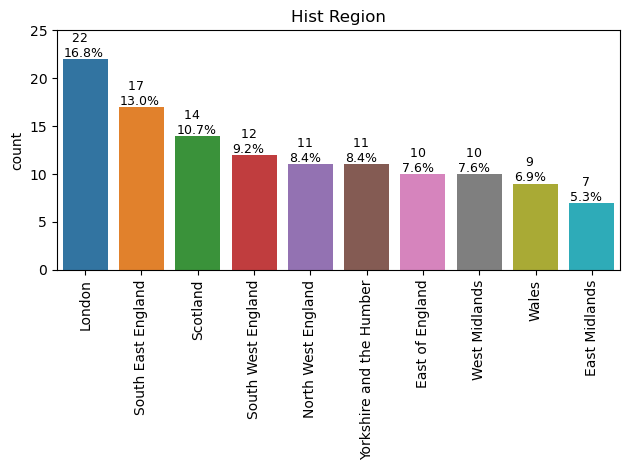

In [23]:
region_cnt = df['Region'].value_counts()
barPlot(region_cnt, 'count', 'Hist Region')

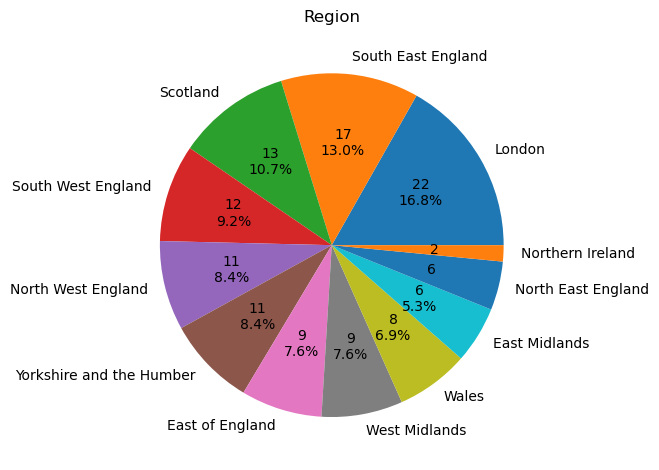

In [24]:
region_cnt = df['Region'].value_counts()
piePlot(region_cnt, 'Region')

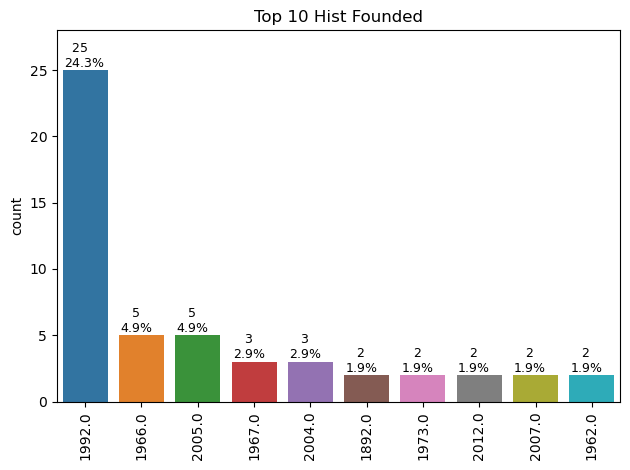

In [25]:
history = df['Founded_year'].value_counts()
# print(history)

barPlot(history, 'count', 'Top 10 Hist Founded')

                           min          mean   median    max
Region                                                      
London                    7000  10228.727273  10229.0  15000
East of England           7500   9415.000000   9415.0  12000
East Midlands             7650   9398.000000   9398.0  10500
South East England        6500   8990.000000   8990.0  12500
Yorkshire and the Humber  7000   8269.909091   8270.0  11789
South West England        6000   8216.833333   8217.0  11000
West Midlands             6000   8096.800000   8097.0  10000
North East England        8000   8000.000000   8000.0   8000
Scotland                  6500   8000.000000   8000.0  12000
Wales                     6000   7771.000000   7771.0  10084
North West England        5500   7471.272727   7471.0   9800
Northern Ireland          6000   6000.000000   6000.0   6000


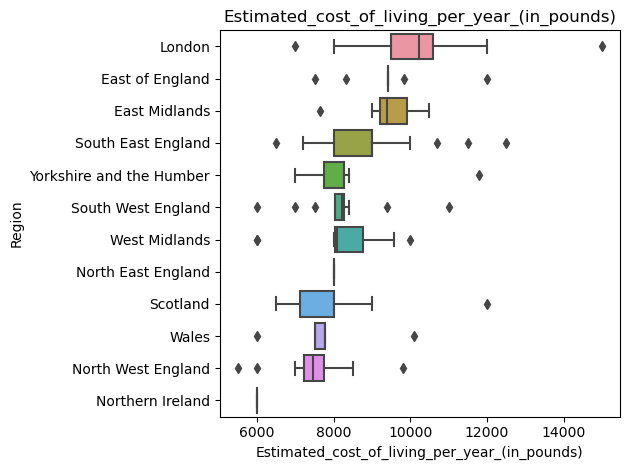

In [29]:
colName = 'Estimated_cost_of_living_per_year_(in_pounds)'
groupName = 'Region'
order = df.groupby(groupName)[colName].median().sort_values(ascending=False).index
print(df.groupby(groupName)[colName].agg(['min', 'mean', np.median, max]).loc[order])

snsBoxplot(df, colName=colName, groupName=groupName, title='Cost of living per region', order=order)

                 min         mean  median    max
Campus_setting                                  
Suburban        7000  8768.378378  8320.0  12000
Urban           5500  8634.911765  8243.5  15000
Rural           6000  7986.000000  8000.0   9400


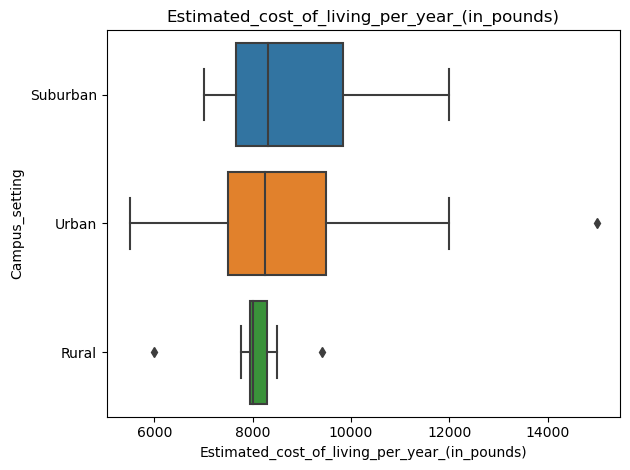

In [30]:
colName = 'Estimated_cost_of_living_per_year_(in_pounds)'
groupName = 'Campus_setting'

order = df.groupby(groupName)[colName].median().sort_values(ascending=False).index
print(df.groupby(groupName)[colName].agg(['min', 'mean', np.median, max]).loc[order])

snsBoxplot(df, colName=colName, groupName=groupName, title='Cost of living per campus_setting', order=order)

In [ ]:
# https://duckduckgo.com/?q=python+plot+map&t=newext&atb=v233-1&ia=web
# https://infopython.com/how-to-plot-longitude-and-latitude-data-in-python/

import plotly.express as px

Lat_median = df.Latitude.median()
Lon_median = df.Longitude.median()

# fig = px.density_mapbox(df, lat='Latitude', lon='Longitude')
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', hover_name='University_name', center=dict(lat=Lat_median, lon=Lon_median), scope='europe')

fig.show()

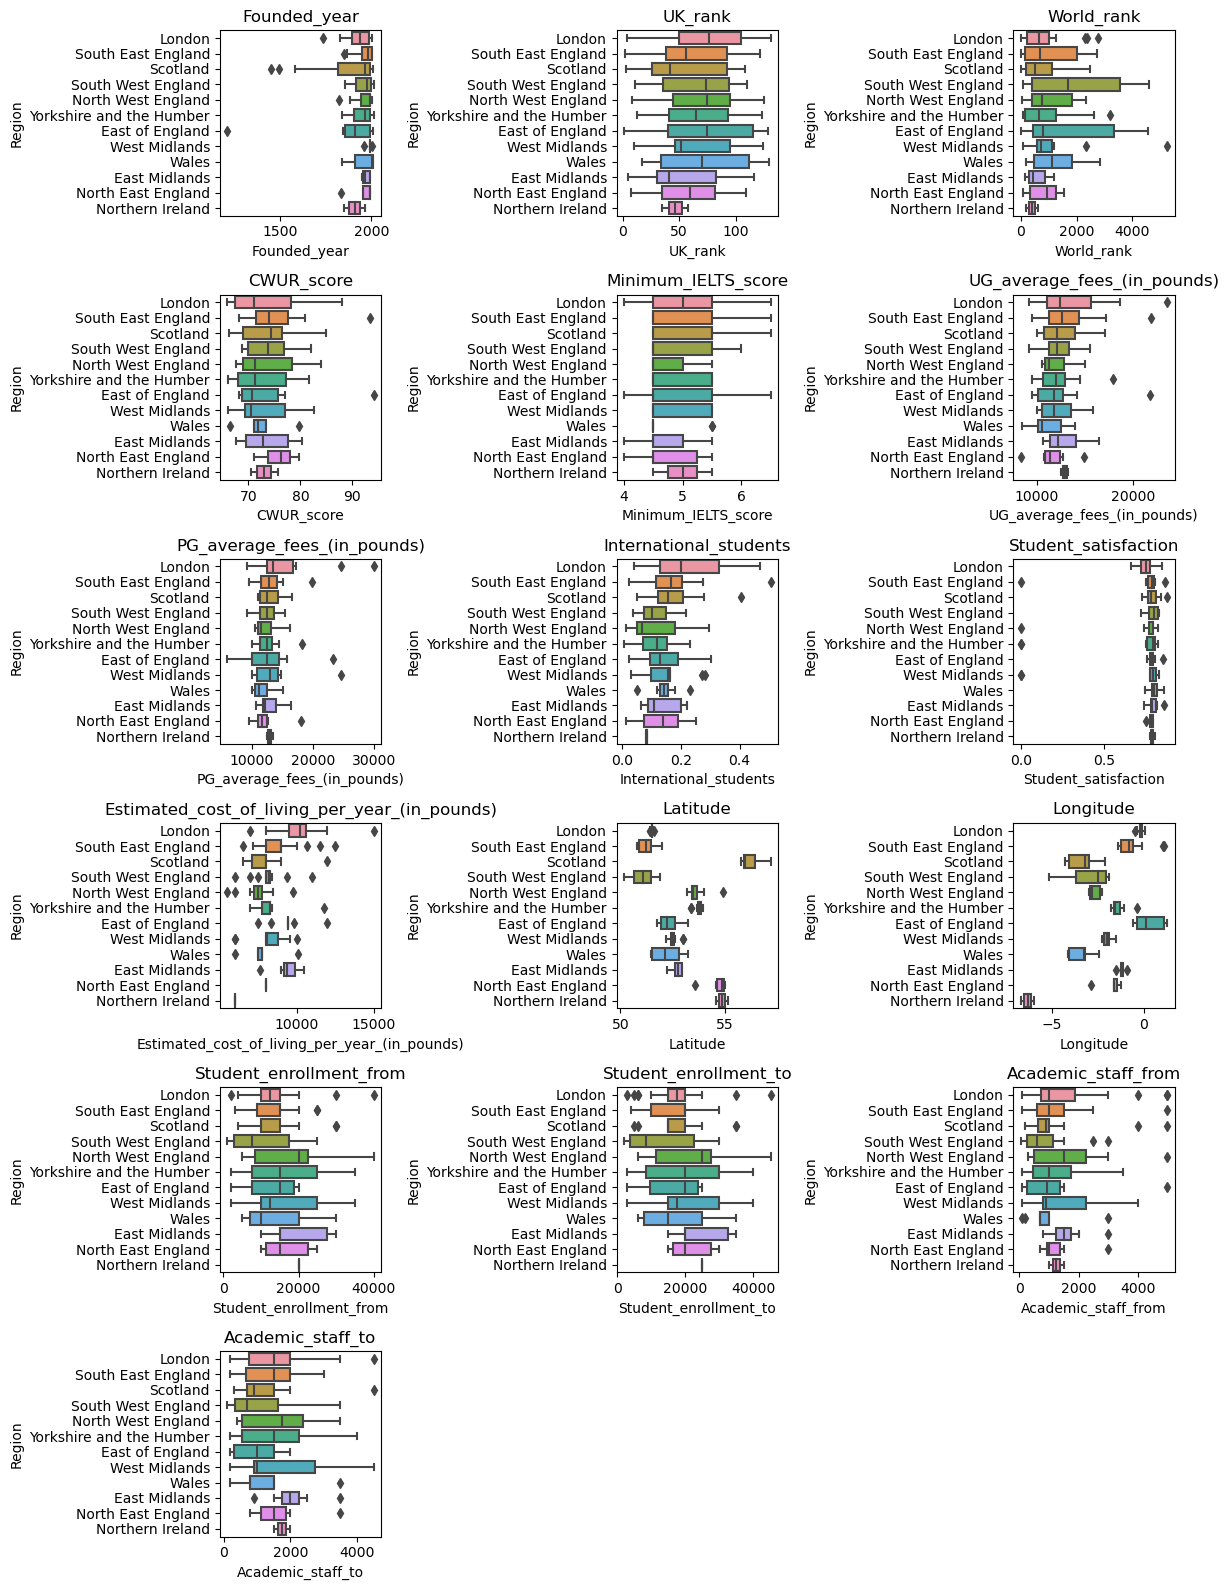

In [32]:
fig = plt.figure(figsize=(12, 16))

# print(df.select_dtypes(include='number').columns)
continuous_columns = [
   'Founded_year', 'UK_rank', 'World_rank', 'CWUR_score',
   'Minimum_IELTS_score', 'UG_average_fees_(in_pounds)',
   'PG_average_fees_(in_pounds)', 'International_students',
   'Student_satisfaction', 'Estimated_cost_of_living_per_year_(in_pounds)',
   'Latitude', 'Longitude', 'Student_enrollment_from',
   'Student_enrollment_to', 'Academic_staff_from', 'Academic_staff_to'
]

order = df['Region'].value_counts().index

for i, col in enumerate(continuous_columns):
    plt.subplot(len(continuous_columns) // 3 + 1, 3, i + 1)
    plt.title(col)
    # order = df.groupby('Region')[col].median().sort_values().index
    sns.boxplot(data=df, x=df[col], y=df['Region'], order=order)

plt.tight_layout()
plt.savefig(f'plots/knowledge_gained/barplot_matrix.png')
plt.show()

Index(['Id', 'Founded_year', 'UK_rank', 'World_rank', 'CWUR_score',
       'Minimum_IELTS_score', 'UG_average_fees_(in_pounds)',
       'PG_average_fees_(in_pounds)', 'International_students',
       'Student_satisfaction', 'Estimated_cost_of_living_per_year_(in_pounds)',
       'Latitude', 'Longitude', 'Student_enrollment_from',
       'Student_enrollment_to', 'Academic_staff_from', 'Academic_staff_to'],
      dtype='object')


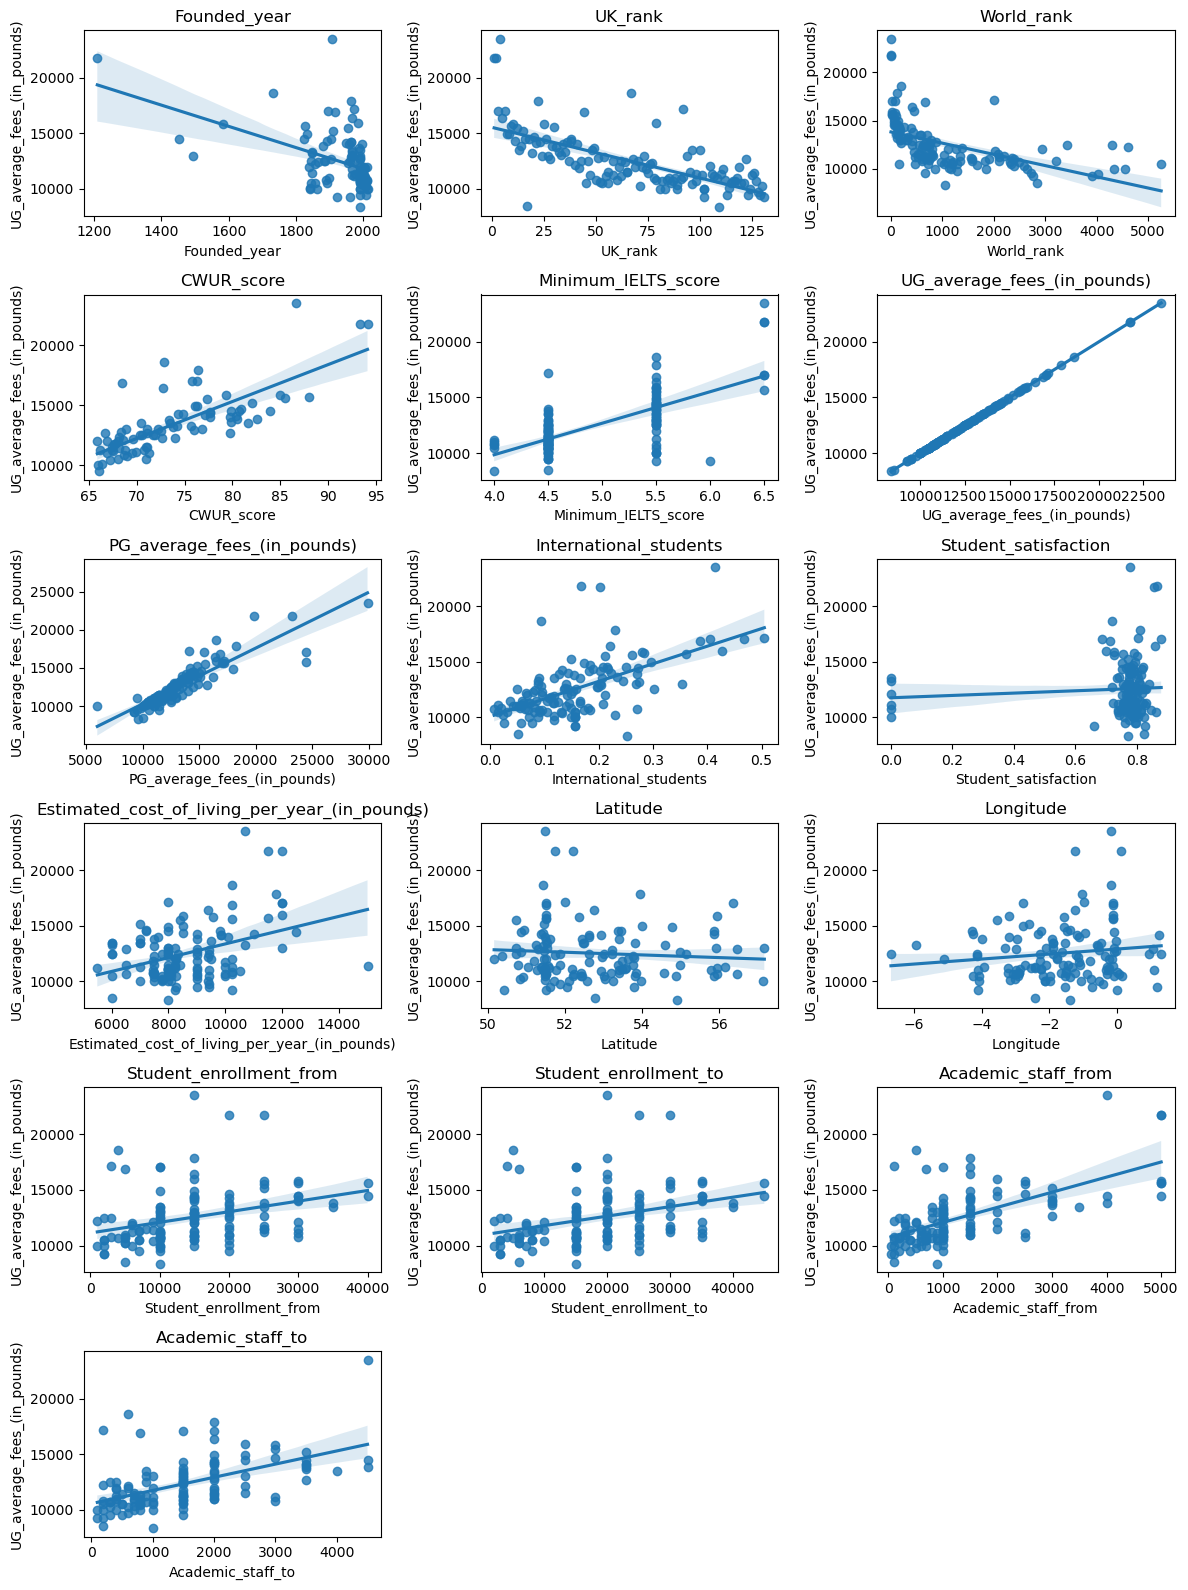

In [33]:
fig = plt.figure(figsize=(12, 16))

print(df.select_dtypes(include='number').columns)
continuous_columns = [
   'Founded_year', 'UK_rank', 'World_rank', 'CWUR_score',
   'Minimum_IELTS_score', 'UG_average_fees_(in_pounds)',
   'PG_average_fees_(in_pounds)', 'International_students',
   'Student_satisfaction', 'Estimated_cost_of_living_per_year_(in_pounds)',
   'Latitude', 'Longitude', 'Student_enrollment_from',
   'Student_enrollment_to', 'Academic_staff_from', 'Academic_staff_to'
]

for i, col in enumerate(continuous_columns):
    plt.subplot(len(continuous_columns) // 3 + 1, 3, i + 1)
    plt.title(col)
    sns.regplot(data=df, x=df[col], y=df['UG_average_fees_(in_pounds)'])

plt.tight_layout()
plt.savefig(f'plots/knowledge_gained/regplot_matrix.png')
plt.show()

